# The Project #
1. This is a project with minimal scaffolding. Expect to use the the discussion forums to gain insights! It’s not cheating to ask others for opinions or perspectives!
2. Be inquisitive, try out new things.
3. Use the previous modules for insights into how to complete the functions! You'll have to combine Pillow, OpenCV, and Pytesseract
4. There are hints provided in Coursera, feel free to explore the hints if needed. Each hint provide progressively more details on how to solve the issue. This project is intended to be comprehensive and difficult if you do it without the hints.

### The Assignment ###
Take a [ZIP file](https://en.wikipedia.org/wiki/Zip_(file_format)) of images and process them, using a [library built into python](https://docs.python.org/3/library/zipfile.html) that you need to learn how to use. A ZIP file takes several different files and compresses them, thus saving space, into one single file. The files in the ZIP file we provide are newspaper images (like you saw in week 3). Your task is to write python code which allows one to search through the images looking for the occurrences of keywords and faces. E.g. if you search for "pizza" it will return a contact sheet of all of the faces which were located on the newspaper page which mentions "pizza". This will test your ability to learn a new ([library](https://docs.python.org/3/library/zipfile.html)), your ability to use OpenCV to detect faces, your ability to use tesseract to do optical character recognition, and your ability to use PIL to composite images together into contact sheets.

Each page of the newspapers is saved as a single PNG image in a file called [images.zip](./readonly/images.zip). These newspapers are in english, and contain a variety of stories, advertisements and images. Note: This file is fairly large (~200 MB) and may take some time to work with, I would encourage you to use [small_img.zip](./readonly/small_img.zip) for testing.

Here's an example of the output expected. Using the [small_img.zip](./readonly/small_img.zip) file, if I search for the string "Christopher" I should see the following image:
![Christopher Search](./readonly/small_project.png)
If I were to use the [images.zip](./readonly/images.zip) file and search for "Mark" I should see the following image (note that there are times when there are no faces on a page, but a word is found!):
![Mark Search](./readonly/large_project.png)

Note: That big file can take some time to process - for me it took nearly ten minutes! Use the small one for testing.

In [1]:
import zipfile
import PIL
from PIL import Image
import pytesseract
import cv2 as cv
import numpy as np
from kraken import pageseg
from PIL import ImageDraw
# loading the face detection classifier
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')

# the rest is up to you!

In [2]:
#There are 4 steps to finish this assignment:
#1. Read Zip package
#2. For each image in the zip file, Use tesseract to 'read' newspaper
#   and record the filename of the image which contain the input text
#3. Went through the images, for each image use OpenCV to detect face and resize / append the image to a new list
#4. For each list of head images, use PIL to combine them to one contact sheet (with 4 images in 1 row)

In [3]:
#Global variable for saving results:
FACE_DIMENTION = 128 # dimention of face images

In [4]:
#Step 1: Read zip file
def readZipFileIntoList(fileName,lstFiles,lstImages):
    with zipfile.ZipFile(fileName,'r') as z:
        for f in z.namelist():
            lstFiles.append(f)
            imgFile = z.open(f)
            image = Image.open(imgFile)
            lstImages.append(image)

In [5]:
def saveImages(lstFiles,lstImages):
    for i in range(len(lstFiles)):
        lstImages[i].save(lstFiles[i])

In [6]:
#Step 2: Find the files which contain target words
def IsImageContainWord(image,word):
    text = pytesseract.image_to_string(image)
    if word in text:
        return True
    else:
        return False

In [7]:
#Step 3: Face detect and process
# through several iterate, I found that scaleFactor = 1.3 and neighbors = 6 meets the requirement better for small_img samples
def cropFaces(imageFile,scaleFactor=1.3,nei=6):
    lstFaces = []
    pil_img=Image.open(imageFile).convert("RGB")
    cv_img = cv.imread(imageFile)
    faces = face_cascade.detectMultiScale(cv_img,scaleFactor = scaleFactor,minNeighbors = nei)
    # And plot all of the rectangles in faces
    for x,y,w,h in faces:
        currentFace = pil_img.crop((x,y,x+w,y+h))
        currentFace.thumbnail((FACE_DIMENTION,FACE_DIMENTION))
        lstFaces.append(currentFace)
    return lstFaces

In [8]:
#Step 4: Putting images into 1 sheet:
def createContactSheet(lstImages):
    firstImage = lstImages[0]
    num = len(lstImages)
    lines = (num+4)//5
    contact_sheet=PIL.Image.new(firstImage.mode, (FACE_DIMENTION*5,FACE_DIMENTION*lines))
    x=0
    y=0

    for img in lstImages:
        # Lets paste the current image into the contact sheet
        contact_sheet.paste(img, (x, y) )
        # Now we update our X position. If it is going to be the width of the image, then we set it to 0
        # and update Y as well to point to the next "line" of the contact sheet.
        if x+FACE_DIMENTION == contact_sheet.width:
            x=0
            y=y+FACE_DIMENTION
        else:
            x=x+FACE_DIMENTION
    return contact_sheet

In [9]:
# The function to input images list, and the target words. 
# Code will go through the images, if it contain the word given, a sheet with all faces on the image will display
def ProcessImagesWithWords(lstImageName,lstImage,words):
    for i in range(len(lstImageName)):
        fileName = lstImageName[i]
        outputText = ''
        image = lstImage[i]
        if (IsImageContainWord(image,words))==True:
            outputText = 'Results found in file {}'.format(fileName)
            faces = cropFaces(fileName)
            if len(faces) == 0:
                outputText += '\n But there were no faces in that file!'
                print(outputText)        
            else:
                print(outputText)
                contactSheet = createContactSheet(faces)
                display(contactSheet)
                

In [10]:
def readFacesInNewspapersWithGivenWords(fileName,lstFile,lstImages,words):
    readZipFileIntoList(fileName,lstFile,lstImages)
    saveImages(lstFile,lstImages)
    ProcessImagesWithWords(lstFile,lstImages,words)

Results found in file a-0.png


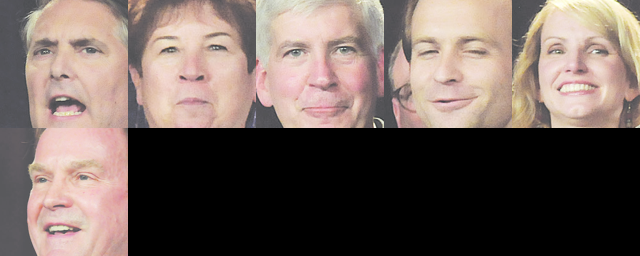

Results found in file a-3.png


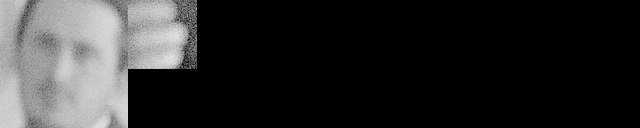

In [11]:
zipFileName = 'readonly/small_img.zip' #The Zip file name which contains png files
targetWords = 'Christopher' #The target word
lstFileNameFromZip = [] #this is the list of file name from zip file
lstImagesFromZip = [] #this is the list of images from zip file
readFacesInNewspapersWithGivenWords(zipFileName,lstFileNameFromZip,lstImagesFromZip,targetWords)

Results found in file a-0.png


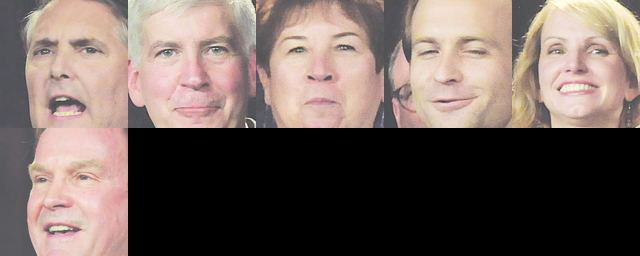

Results found in file a-1.png


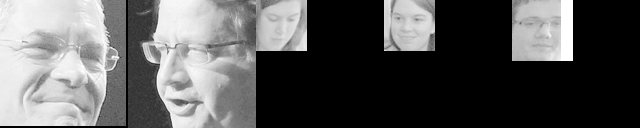

Results found in file a-10.png
 But there were no faces in that file!
Results found in file a-13.png


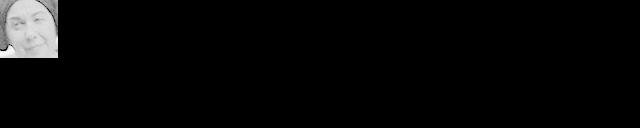

Results found in file a-2.png


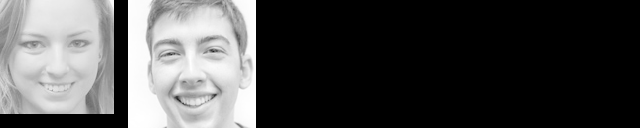

Results found in file a-3.png


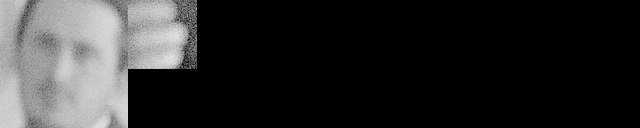

Results found in file a-8.png
 But there were no faces in that file!


In [12]:
zipFileName1 = 'readonly/images.zip' #The Zip file name which contains png files
targetWords1 = 'Mark' #The target word
lstFileNameFromZip1 = [] #this is the list of file name from zip file
lstImagesFromZip1 = [] #this is the list of images from zip file
readFacesInNewspapersWithGivenWords(zipFileName1,lstFileNameFromZip1,lstImagesFromZip1,targetWords1)